In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [39]:
# Distribution-fitting method outline from http://www.insightsbot.com/blog/WEjdW/fitting-probability-distributions-with-python-part-1

def fit_dist(samples):
    dist_tests = ['norm', 'expon', 'uniform', 'rayleigh']
    dist_results = []
    params = {}
    for dist_name in dist_tests:

        # Fit sample data to distribution
        dist = getattr(stats, dist_name)
        param = dist.fit(samples)
        params[dist_name] = param

        # Run the Kolmogorov-Smirnov test on the distribution
        D, p = stats.kstest(samples, dist_name, args = param)

        dist_results.append((dist_name, p))

    print("Kolmogorov-Smirnov test results")
    for result in dist_results:
        print("%15s\t: %.15f"%(result[0], result[1]))
    dist_guess, p = (max(dist_results, key=lambda item:item[1]))
    print()
    print("Distribution guess is %s with a p value of %.15f"%(dist_guess, p))
    print()
    return (dist_guess, params[dist_guess])

# Getting Samples from bsp_prototype

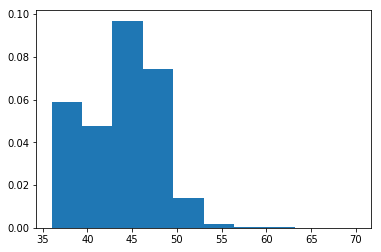

Min: 36
Max: 830
Kolmogorov-Smirnov test results
           norm	: 0.000000000000000
          expon	: 0.000000000000000
        uniform	: 0.000000000000000
       rayleigh	: 0.000000000000000

Distribution guess is norm with a p value of 0.000000000000000



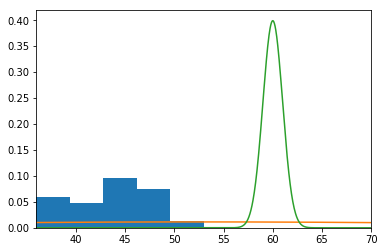

In [76]:
# Load and plot the generated values
# csv generated with `mpirun -np 1 scripts/app_gen/app_gen_metrics 60 1 gaussian 1000`
samples = np.genfromtxt("bsp_prototype_results/magrathea_b305059c32fc7.csv", delimiter=',')
times = samples[:,-1] - samples[:,-2]
plt.hist(times, range=(times.min(),70), density=True)
plt.plot()
plt.show()
print("Min: %d"%times.min())
print("Max: %d"%times.max())

# Run the distribution test
# TODO: The correct distribution is not selected
dist, params = fit_dist(times)
mean = samples[0,4]
std = samples[0,5]

frame_max = 70

# Plot the fitted distribution
x_vals = np.linspace(times.min(),frame_max,1000)
plt.hist(times, range=(times.min(),frame_max), density=True)
plt.plot(x_vals, stats.norm.pdf(x_vals, loc=params[0], scale=params[1]))
plt.plot(x_vals, stats.norm.pdf(x_vals, loc=mean, scale=std))
plt.xlim(times.min(), frame_max)
plt.show()

# Generating Samples from NumPy

Kolmogorov-Smirnov test results
           norm	: 0.000000
          expon	: 0.000000
        uniform	: 0.000000
       rayleigh	: 0.948563

Distribution guess is rayleigh with a p value of 0.948563

(0.0004612180887938308, 0.999744587255722)


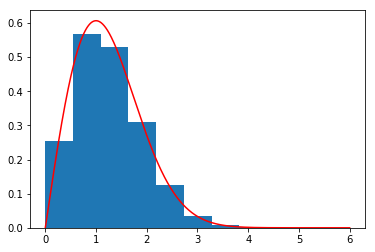

Max value from sampling: 5.461444
Min value from sampling: 0.000698


In [4]:
scale = 1 # The scale of the Rayleigh distribution
n = 1000000 # The number of points
noise_ratio = 0 #0.0004 # The percentage of values that are just noise

# Generate values from distribution
samples = np.random.rayleigh(scale, int(n*(1.0-noise_ratio)))

# Add noise
noise = np.random.normal(np.mean(samples), np.std(samples), int(n*(noise_ratio)))
samples = np.append(samples, noise)

plt.hist(samples, bins=10, density=True)

# Fit to distribution
dist, params = fit_dist(samples)

print(params)

xs = np.linspace(0,6,1000)
plt.plot(xs, stats.rayleigh.pdf(xs, loc=params[0], scale=params[1]), 'r')
plt.show()
# stats.rayleigh.pdf(args = params)

# Find maxima
print("Max value from sampling: %f"%np.max(samples))
print("Min value from sampling: %f"%np.min(samples))

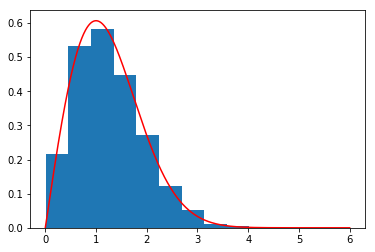

(0.0003618500947662151, 6.392994326226972e-05, 0.3518324326674016)


/home/cleap/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2159: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/home/cleap/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/home/cleap/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


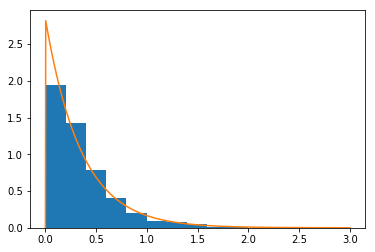

In [18]:
# Fitting a Pareto Distribution to the data

num_samples = 20000
cutoff = 0.05

new_samples = np.random.rayleigh(scale=params[1], size=num_samples)

xs = np.linspace(0,6,1000)
plt.hist(new_samples, density=True)
plt.plot(xs, stats.rayleigh.pdf(xs, loc=params[0], scale=params[1]), 'r')
plt.show()

top = new_samples[np.argsort(new_samples)]
top = top[int(num_samples*(1-cutoff)):] - np.quantile(new_samples,(1-cutoff))
plt.hist(top, density=True)

xs = np.linspace(0,3,1000)
gp_param = stats.genpareto.fit(top, 0)
print(gp_param)
plt.plot(xs, stats.genpareto.pdf(xs, gp_param[0], gp_param[1], gp_param[2]))

plt.show()